# ÌîÑÎ°úÏ†ùÌä∏ : ÎÑ§Ïù¥Î≤Ñ ÏòÅÌôîÎ¶¨Î∑∞ Í∞êÏÑ±Î∂ÑÏÑù ÎèÑÏ†ÑÌïòÍ∏∞
  
  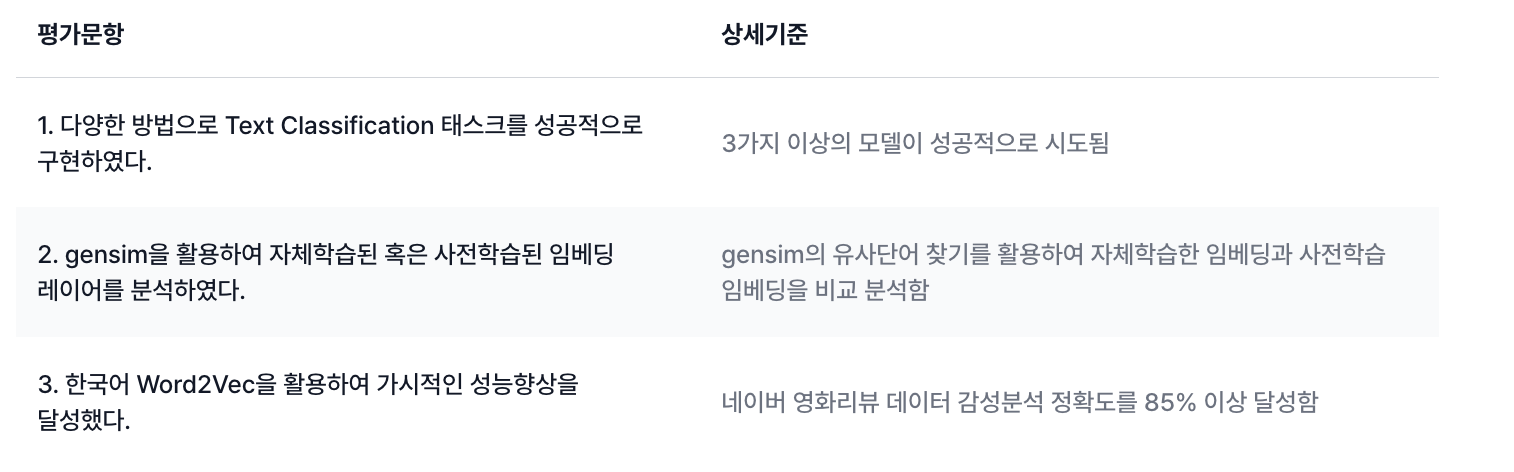

In [1]:
import pandas
import konlpy
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(pandas.__version__)
print(konlpy.__version__)
print(gensim.__version__)

1.3.3
0.5.2
4.1.2


# 1) Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÏôÄ ÌôïÏù∏

In [2]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Î¥ÖÏãúÎã§. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

id                                           document  label
0   9976970                                ÏïÑ ÎçîÎπô.. ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨      0
1   3819312                  Ìù†...Ìè¨Ïä§ÌÑ∞Î≥¥Í≥† Ï¥àÎî©ÏòÅÌôîÏ§Ñ....Ïò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞® Í∞ÄÎ≥çÏßÄ ÏïäÍµ¨ÎÇò      1
2  10265843                                  ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§      0
3   9045019                      ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ..ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§..ÌèâÏ†ê Ï°∞Ï†ï      0
4   6483659  ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏Ïùò ÏùµÏÇ¥Ïä§Îü∞ Ïó∞Í∏∞Í∞Ä ÎèãÎ≥¥ÏòÄÎçò ÏòÅÌôî!Ïä§ÌååÏù¥ÎçîÎß®ÏóêÏÑú ÎäôÏñ¥Î≥¥Ïù¥Í∏∞Îßå ÌñàÎçò Ïª§Ïä§Ìã¥ ...      1

In [3]:
print('ÌõàÎ†®Îç∞Ïù¥ÌÑ∞:',len(train_data),', ÌÖåÏä§Ìä∏ÌÖåÏù¥ÌÑ∞:', len(test_data))

ÌõàÎ†®Îç∞Ïù¥ÌÑ∞: 150000 , ÌÖåÏä§Ìä∏ÌÖåÏù¥ÌÑ∞: 50000


> idÎäî Ïì∏Î™®ÏóÜÎäî Ï†ïÎ≥¥ÎãàÍπå ÏÇ≠Ï†ú, document, labelÎßå ÏÇ¨Ïö©ÌïòÍ∏∞Î°ú ÌïúÎã§

# 2) Îç∞Ïù¥ÌÑ∞Î°úÎçî Íµ¨ÏÑ±
- Ïã§Ïäµ Îïå Îã§Î£®ÏóàÎçò IMDB Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÌÖçÏä§Ìä∏Î•º Í∞ÄÍ≥µÌïòÏó¨ imdb.data_loader() Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌïòÎ©¥ Ïà´Ïûê Ïù∏Îç±Ïä§Î°ú Î≥ÄÌôòÎêú ÌÖçÏä§Ìä∏ÏôÄ word_to_index ÎîïÏÖîÎÑàÎ¶¨ÍπåÏßÄ ÏπúÏ†àÌïòÍ≤å Ï†úÍ≥µÌï©ÎãàÎã§. Í∑∏Îü¨ÎÇò Ïù¥Î≤àÏóê Îã§Î£®Í≤å Îê† nsmc Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ Ï†ÑÌòÄ Í∞ÄÍ≥µÎêòÏßÄ ÏïäÏùÄ ÌÖçÏä§Ìä∏ ÌååÏùºÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÏäµÎãàÎã§. Ïù¥Í≤ÉÏùÑ ÏùΩÏñ¥ÏÑú imdb.data_loader()ÏôÄ ÎèôÏùºÌïòÍ≤å ÎèôÏûëÌïòÎäî ÏûêÏã†ÎßåÏùò data_loaderÎ•º ÎßåÎì§Ïñ¥ Î≥¥Îäî Í≤ÉÏúºÎ°ú ÏãúÏûëÌï©ÎãàÎã§. data_loader ÏïàÏóêÏÑúÎäî Îã§ÏùåÏùÑ ÏàòÌñâÌï¥Ïïº Ìï©ÎãàÎã§.  


- Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÎ≥µ Ï†úÍ±∞
- NaN Í≤∞Ï∏°Ïπò Ï†úÍ±∞
- ÌïúÍµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ°ú ÌÜ†ÌÅ∞Ìôî
- Î∂àÏö©Ïñ¥(Stopwords) Ï†úÍ±∞
- ÏÇ¨Ï†Ñword_to_index Íµ¨ÏÑ±
- ÌÖçÏä§Ìä∏ Ïä§Ìä∏ÎßÅÏùÑ ÏÇ¨Ï†Ñ Ïù∏Îç±Ïä§ Ïä§Ìä∏ÎßÅÏúºÎ°ú Î≥ÄÌôò
- X_train, y_train, X_test, y_test, word_to_index Î¶¨ÌÑ¥

In [4]:
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

- Ï§ëÎ≥µÎêòÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏùåÏùÑ Î∞úÍ≤¨ÌñàÎã§

In [5]:
#Ï§ëÎ≥µ Ï†úÍ±∞, Îπà Í∞í Ï†úÍ±∞, Ï†ïÏàòÏù∏ÏΩîÎî©ÍπåÏßÄ Ìïú Î≤àÏóê Ìï¥Ï§¨Îã§

from konlpy.tag import Mecab
import numpy as np
from collections import Counter

tokenizer = Mecab()
stopwords = ['Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§']

def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how='any')
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how='any')
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) #ÌÜ†ÌÅ∞Ìôî
        temp_X = [word for word in temp_X if not word in stopwords]
        X_train.append(temp_X)
        
    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence)
        temp_X = [word for word in temp_X if not word in stopwords]
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNUSED>'] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index
    
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

In [6]:
print(X_train[:3], X_test[:3], y_train[:3], y_test[:3])

[[32, 74, 919, 4, 4, 39, 228, 20, 33, 748], [1028, 4, 11, 519, 549, 687, 5, 120, 4, 70, 1639, 52, 925, 1006, 15, 44, 391], [24, 205, 3]] [[832, 130], [3], [85, 111, 58, 4, 70, 950, 332, 44, 38, 100, 37, 641, 3557, 73, 917]] [0 1 0] [1 0 0]


In [7]:
#Ìå®Îî© Ï∂îÍ∞Ä !! (Ïã§Ï†ú Ïù∏ÏΩîÎî© Ïù∏Îç±Ïä§Í∞Ä Î∞ÄÎ†§ÏûàÏúºÎØÄÎ°ú)
word_to_index['<PAD>']= 0  # Ìå®Îî©Ïö© Îã®Ïñ¥
word_to_index['<BOS>']= 1  # Î¨∏Ïû•Ïùò ÏãúÏûëÏßÄÏ†ê
word_to_index['<UNK>']= 2  # ÏÇ¨Ï†ÑÏóê ÏóÜÎäî(Unknown) Îã®Ïñ¥
word_to_index['<UNUSED>']=3

In [8]:
print(f"ÌõàÎ†®ÏÉòÌîå Í∞ØÏàò: {len(X_train)}, ÌÖåÏä§Ìä∏Í∞ØÏàò: {len(X_test)}")

ÌõàÎ†®ÏÉòÌîå Í∞ØÏàò: 146182, ÌÖåÏä§Ìä∏Í∞ØÏàò: 49157


In [9]:
word_to_index

{'<PAD>': 0,
 '<BOS>': 1,
 '<UNK>': 2,
 '<UNUSED>': 3,
 '.': 4,
 'ÏòÅÌôî': 5,
 'Îã§': 6,
 'Í≥†': 7,
 'Ìïò': 8,
 'ÏùÑ': 9,
 'Î≥¥': 10,
 '..': 11,
 'Í≤å': 12,
 ',': 13,
 '!': 14,
 'ÏßÄ': 15,
 'Ïûà': 16,
 'ÏóÜ': 17,
 '?': 18,
 'Ï¢ã': 19,
 'ÎÇò': 20,
 'Ïóà': 21,
 'Îßå': 22,
 'ÎäîÎç∞': 23,
 'ÎÑàÎ¨¥': 24,
 'Î¥§': 25,
 'Ï†Å': 26,
 'Ïïà': 27,
 'Ï†ïÎßê': 28,
 'Î°ú': 29,
 'Ïùå': 30,
 'Í≤É': 31,
 'ÏïÑ': 32,
 'ÎÑ§Ïöî': 33,
 'Ïû¨Î∞å': 34,
 'Ïñ¥': 35,
 'Í∞ô': 36,
 'Ï†ê': 37,
 'ÏßÄÎßå': 38,
 'ÏßÑÏßú': 39,
 'Ìñà': 40,
 'ÏóêÏÑú': 41,
 'Í∏∞': 42,
 'ÎÑ§': 43,
 'Ïïä': 44,
 'Í±∞': 45,
 'Ïïò': 46,
 'Ïàò': 47,
 'Îêò': 48,
 'Î©¥': 49,
 '„Öã„Öã': 50,
 'Îßê': 51,
 'Ïó∞Í∏∞': 52,
 'Ïù∏': 53,
 'Ï£º': 54,
 'ÎÇ¥': 55,
 'ÏµúÍ≥†': 56,
 '~': 57,
 'ÌèâÏ†ê': 58,
 'Ïù¥Îü∞': 59,
 'Îçò': 60,
 'Ïñ¥Ïöî': 61,
 'Ìï†': 62,
 'Ïôú': 63,
 'Í≤†': 64,
 '1': 65,
 'Ïä§ÌÜ†Î¶¨': 66,
 'Ìï¥': 67,
 'ÏäµÎãàÎã§': 68,
 '„Öã„Öã„Öã': 69,
 '...': 70,
 'ÎìúÎùºÎßà': 71,
 'ÏÉùÍ∞Å': 72,
 'ÏïÑÎãà': 73,
 'Îçî': 74,
 'Í∑∏': 75,
 'Ïã∂': 76,
 'ÏÇ¨Îûå': 77

In [10]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [11]:
# Î¨∏Ïû• 1Í∞úÎ•º ÌôúÏö©Ìï† ÎîïÏÖîÎÑàÎ¶¨ÏôÄ Ìï®Íªò Ï£ºÎ©¥, Îã®Ïñ¥ Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏ Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌï¥ Ï£ºÎäî Ìï®ÏàòÏûÖÎãàÎã§. 
# Îã®, Î™®Îì† Î¨∏Ïû•ÏùÄ <BOS>Î°ú ÏãúÏûëÌïòÎäî Í≤ÉÏúºÎ°ú Ìï©ÎãàÎã§. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# Ïó¨Îü¨ Í∞úÏùò Î¨∏Ïû• Î¶¨Ïä§Ìä∏Î•º ÌïúÍ∫ºÎ≤àÏóê Îã®Ïñ¥ Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏ Î≤°ÌÑ∞Î°ú encodeÌï¥ Ï£ºÎäî Ìï®ÏàòÏûÖÎãàÎã§. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# Ïà´Ïûê Î≤°ÌÑ∞Î°ú encodeÎêú Î¨∏Ïû•ÏùÑ ÏõêÎûòÎåÄÎ°ú decodeÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]Î•º ÌÜµÌï¥ <BOS>Î•º Ï†úÏô∏

# Ïó¨Îü¨ Í∞úÏùò Ïà´Ïûê Î≤°ÌÑ∞Î°ú encodeÎêú Î¨∏Ïû•ÏùÑ ÌïúÍ∫ºÎ≤àÏóê ÏõêÎûòÎåÄÎ°ú decodeÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [12]:
#Ìïú Î≤à ÌÖåÏä§Ìä∏ Ìï¥Î≥∏Îã§
print(get_decoded_sentence(X_train[3], index_to_word))

Ïù¥ÏïºÍ∏∞ Íµ¨Î®º . . ÏÜîÏßÅÌûà Ïû¨ÎØ∏ ÏóÜ Îã§ . . ÌèâÏ†ê Ï°∞Ï†ï


In [13]:
print('1Î≤àÏß∏ Î¶¨Î∑∞ Î¨∏Ïû• Í∏∏Ïù¥ : ',len(X_train[0]))
print('2Î≤àÏß∏ Î¶¨Î∑∞ Î¨∏Ïû• Í∏∏Ïù¥ : ',len(X_test[1]))

1Î≤àÏß∏ Î¶¨Î∑∞ Î¨∏Ïû• Í∏∏Ïù¥ :  10
2Î≤àÏß∏ Î¶¨Î∑∞ Î¨∏Ïû• Í∏∏Ïù¥ :  1


> üí° ÌèâÍ∑† Î¨∏Ïû•Í∏∏Ïù¥Î•º Ï∞∏Í≥†ÌïòÏó¨, maxlenÏùÑ ÏßÄÏ†ïÌï¥Ï£ºÍ≤†Îã§

# 3) Î™®Îç∏ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù Î∞è Í∞ÄÍ≥µ
- Îç∞Ïù¥ÌÑ∞ÏÖã ÎÇ¥ Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨
- Ï†ÅÏ†àÌïú ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥ ÏßÄÏ†ï
- keras.preprocessing.sequence.pad_sequences ÏùÑ ÌôúÏö©Ìïú Ìå®Îî© Ï∂îÍ∞Ä

In [14]:
#Îç∞Ïù¥ÌÑ∞ÏÖã ÎÇ¥ Î¨∏Ïû•Í∏∏Ïù¥ Î∂ÑÌè¨, Ï†ÅÏ†àÌïú ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥ ÏßÄÏ†ï

total_data_text = list(X_train) + list(X_test)
# ÌÖçÏä§Ìä∏Îç∞Ïù¥ÌÑ∞ Î¨∏Ïû•Í∏∏Ïù¥Ïùò Î¶¨Ïä§Ìä∏Î•º ÏÉùÏÑ±Ìïú ÌõÑ
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# Î¨∏Ïû•Í∏∏Ïù¥Ïùò ÌèâÍ∑†Í∞í, ÏµúÎåÄÍ∞í, ÌëúÏ§ÄÌé∏Ï∞®Î•º Í≥ÑÏÇ∞Ìï¥ Î≥∏Îã§. 
print('Î¨∏Ïû•Í∏∏Ïù¥ ÌèâÍ∑† : ', np.mean(num_tokens))
print('Î¨∏Ïû•Í∏∏Ïù¥ ÏµúÎåÄ : ', np.max(num_tokens))
print('Î¨∏Ïû•Í∏∏Ïù¥ ÌëúÏ§ÄÌé∏Ï∞® : ', np.std(num_tokens))

# ÏòàÎ•ºÎì§Ïñ¥, ÏµúÎåÄ Í∏∏Ïù¥Î•º (ÌèâÍ∑† + 2*ÌëúÏ§ÄÌé∏Ï∞®)Î°ú ÌïúÎã§Î©¥,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print(f'Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò {np.sum(num_tokens < max_tokens) / len(num_tokens)}%Í∞Ä maxlen ÏÑ§Ï†ïÍ∞í Ïù¥ÎÇ¥Ïóê Ìè¨Ìï®Îê©ÎãàÎã§. ')

Î¨∏Ïû•Í∏∏Ïù¥ ÌèâÍ∑† :  15.96940191154864
Î¨∏Ïû•Í∏∏Ïù¥ ÏµúÎåÄ :  116
Î¨∏Ïû•Í∏∏Ïù¥ ÌëúÏ§ÄÌé∏Ï∞® :  12.843571191092
pad_sequences maxlen :  41
Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò 0.9342988343341575%Í∞Ä maxlen ÏÑ§Ï†ïÍ∞í Ïù¥ÎÇ¥Ïóê Ìè¨Ìï®Îê©ÎãàÎã§. 


In [16]:
#Ìå®Îî© Ï∂îÍ∞Ä
import tensorflow as tf 

X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # ÌòπÏùÄ 'pre'
                                                        maxlen=maxlen)

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # ÌòπÏùÄ 'pre'
                                                       maxlen=maxlen)

print(X_train.shape)
print(X_test.shape)

(146182, 41)
(49157, 41)


# 4) Î™®Îç∏ Íµ¨ÏÑ±, ÌõàÎ†®
- Î™®Îç∏ÏùÄ 3Í∞ÄÏßÄ Ïù¥ÏÉÅ Îã§ÏñëÌïòÍ≤å Íµ¨ÏÑ±ÌïòÏó¨ Ïã§ÌóòÌï¥ Î≥¥ÏÑ∏Ïöî.

## Î™®Îç∏1.
- Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÏùò Í≤ΩÏö∞, Ï∂úÎ†•Ï∏µÏóê Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ•º ÏÇ¨Ïö©Ìï¥Ïïº ÌïòÎØÄÎ°ú ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°úÎäî ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÎ•º ÏÇ¨Ïö©
- ÏÜêÏã§ Ìï®ÏàòÎ°ú ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº Ìï®ÏàòÎ•º ÏÇ¨Ïö©. 
- ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ïù∏ Î∞∞Ïπò ÌÅ¨Í∏∞Îäî 64Ïù¥Î©∞, 15 ÏóêÌè¨ÌÅ¨Î•º ÏàòÌñâ.
- callback ÏóêÎäî es(early stopping), mc(model checkpoint)Î•º Ï†ÅÏö©ÌñàÎã§. Ï°∞Í∏∞Ï¢ÖÎ£å / Î™®Îç∏ÏÉÅÌÉú Ï†ÄÏû•

In [17]:
#Model 1 - LSTM
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞ÏûÖÎãàÎã§(10,000Í∞úÏùò Îã®Ïñ¥)
embedding_dim = 16 # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®Ïõê Ïàò (Î≥ÄÍ≤Ω Í∞ÄÎä•Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞)
hidden_units = 128

model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_shape=(None, )))
model1.add(LSTM(hidden_units))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history1 = model1.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1828/1828 [==============================] - 15s 6ms/step - loss: 0.4191 - acc: 0.8048 - val_loss: 0.3632 - val_acc: 0.8435

Epoch 00001: val_acc improved from -inf to 0.84345, saving model to best_model.h5
Epoch 2/15
1828/1828 [==============================] - 11s 6ms/step - loss: 0.3387 - acc: 0.8532 - val_loss: 0.3358 - val_acc: 0.8533

Epoch 00002: val_acc improved from 0.84345 to 0.85327, saving model to best_model.h5
Epoch 3/15
1828/1828 [==============================] - 11s 6ms/step - loss: 0.3151 - acc: 0.8652 - val_loss: 0.3382 - val_acc: 0.8592

Epoch 00003: val_acc improved from 0.85327 to 0.85915, saving model to best_model.h5
Epoch 4/15
1828/1828 [==============================] - 11s 6ms/step - loss: 0.3000 - acc: 0.8732 - val_loss: 0.3128 - val_acc: 0.8660

Epoch 00004: val_acc improved from 0.85915 to 0.86596, saving model to best_model.h5
Epoch 5/15
1828/1828 [==============================] - 12s 6ms/step - loss: 0.2892 - acc: 0.8781 - val_loss: 0.3086 - 

- Ï†ïÌôïÎèÑÍ∞Ä train 90%, validation 87%ÍπåÏßÄ ÎÇòÏôîÎã§

## Î™®Îç∏2. 

In [18]:
vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞ÏûÖÎãàÎã§(10,000Í∞úÏùò Îã®Ïñ¥)
embedding_dim = 16 # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®Ïõê Ïàò (Î≥ÄÍ≤Ω Í∞ÄÎä•Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞)
hidden_units = 128

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_shape=(None,)))
model2.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model2.add(tf.keras.layers.MaxPooling1D(5))
model2.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model2.add(tf.keras.layers.GlobalMaxPooling1D())
model2.add(tf.keras.layers.Dense(8, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # ÏµúÏ¢Ö Ï∂úÎ†•ÏùÄ Í∏çÏ†ï/Î∂ÄÏ†ïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî 1dim ÏûÖÎãàÎã§.

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          1808      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [19]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history2 = model2.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1828/1828 [==============================] - 10s 5ms/step - loss: 0.4021 - acc: 0.8087 - val_loss: 0.3340 - val_acc: 0.8539

Epoch 00001: val_acc did not improve from 0.87061
Epoch 2/15
1828/1828 [==============================] - 8s 4ms/step - loss: 0.2974 - acc: 0.8734 - val_loss: 0.3267 - val_acc: 0.8580

Epoch 00002: val_acc did not improve from 0.87061
Epoch 3/15
1828/1828 [==============================] - 8s 5ms/step - loss: 0.2474 - acc: 0.8999 - val_loss: 0.3414 - val_acc: 0.8579

Epoch 00003: val_acc did not improve from 0.87061
Epoch 4/15
1828/1828 [==============================] - 8s 4ms/step - loss: 0.1961 - acc: 0.9249 - val_loss: 0.3770 - val_acc: 0.8489

Epoch 00004: val_acc did not improve from 0.87061
Epoch 5/15
1828/1828 [==============================] - 8s 4ms/step - loss: 0.1518 - acc: 0.9445 - val_loss: 0.4315 - val_acc: 0.8423

Epoch 00005: val_acc did not improve from 0.87061
Epoch 6/15
1828/1828 [==============================] - 8s 4ms/step - loss

- Ï†ïÌôïÎèÑÍ∞Ä train 95%, validation 84%ÍπåÏßÄ ÎÇòÏôîÎã§

## Î™®Îç∏3.

In [20]:
#ÌõàÎ†®            
epochs=20  # Î™á epochÎ•º ÌõàÎ†®ÌïòÎ©¥ Ï¢ãÏùÑÏßÄ Í≤∞Í≥ºÎ•º Î≥¥Î©¥ÏÑú Î∞îÍæ∏Ïñ¥ Î¥ÖÏãúÎã§. 

model3 = Sequential()
model3.add(Embedding(vocab_size, embedding_dim))
model3.add(LSTM(hidden_units))
model3.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history3 = model3.fit(X_train, y_train, epochs=epochs, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/20
1828/1828 [==============================] - 13s 6ms/step - loss: 0.4052 - acc: 0.8183 - val_loss: 0.3600 - val_acc: 0.8444

Epoch 00001: val_acc improved from -inf to 0.84444, saving model to best_model.h5
Epoch 2/20
1828/1828 [==============================] - 11s 6ms/step - loss: 0.3358 - acc: 0.8547 - val_loss: 0.3301 - val_acc: 0.8563

Epoch 00002: val_acc improved from 0.84444 to 0.85635, saving model to best_model.h5
Epoch 3/20
1828/1828 [==============================] - 11s 6ms/step - loss: 0.3112 - acc: 0.8674 - val_loss: 0.3182 - val_acc: 0.8632

Epoch 00003: val_acc improved from 0.85635 to 0.86315, saving model to best_model.h5
Epoch 4/20
1828/1828 [==============================] - 11s 6ms/step - loss: 0.2965 - acc: 0.8743 - val_loss: 0.3148 - val_acc: 0.8661

Epoch 00004: val_acc improved from 0.86315 to 0.86609, saving model to best_model.h5
Epoch 5/20
1828/1828 [==============================] - 11s 6ms/step - loss: 0.2864 - acc: 0.8795 - val_loss: 0.3086 - 

- Ïù¥Î≤àÏóêÎäî train Ï†ïÌôïÎèÑ: 90%, validation Ï†ïÌôïÎèÑ: 87%

# 5) Î™®Îç∏ ÌèâÍ∞Ä

In [21]:
#ÎßàÏßÄÎßâ ÌïôÏäµ ÎÅùÎÇ∏ Î™®Îç∏ÏùÑ ÌÖåÏä§Ìä∏ÏÖãÏúºÎ°ú ÌèâÍ∞Ä
results1 = model1.evaluate(X_test, y_test, verbose=2)
results2 = model2.evaluate(X_test, y_test, verbose=2)
results3 = model3.evaluate(X_test, y_test, verbose=2)

print(f'ÌÖåÏä§Ìä∏ 1 Ï†ïÌôïÎèÑ: {results1[1]*100:.2f}%')
print(f'ÌÖåÏä§Ìä∏ 2 Ï†ïÌôïÎèÑ: {results2[1]*100:.2f}%')
print(f'ÌÖåÏä§Ìä∏ 3 Ï†ïÌôïÎèÑ: {results3[1]*100:.2f}%')

1537/1537 - 3s - loss: 0.3170 - acc: 0.8684
1537/1537 - 2s - loss: 0.5170 - acc: 0.8352
1537/1537 - 3s - loss: 0.3152 - acc: 0.8676
ÌÖåÏä§Ìä∏ 1 Ï†ïÌôïÎèÑ: 86.84%
ÌÖåÏä§Ìä∏ 2 Ï†ïÌôïÎèÑ: 83.52%
ÌÖåÏä§Ìä∏ 3 Ï†ïÌôïÎèÑ: 86.76%


- verbose=0: ÏïÑÎ¨¥Îü∞ Ï∂úÎ†•ÎèÑ ÌïòÏßÄ ÏïäÏäµÎãàÎã§.
- verbose=1: ÌõàÎ†® ÏßÑÌñâ ÏÉÅÌô©ÏùÑ ÏßÑÌñâ ÎßâÎåÄ(progress bar) ÌòïÌÉúÎ°ú ÌëúÏãúÌï©ÎãàÎã§.
- verbose=2: Ìïú Î≤àÏóê Ìïú ÏóêÌè¨ÌÅ¨ÎßàÎã§ Ìïú Ï§ÑÏî© ÌõàÎ†® ÏßÑÌñâ ÏÉÅÌô©ÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§.

In [22]:
history_dict1 = history1.history
history_dict2 = history2.history
history_dict3 = history3.history

print(history_dict2.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


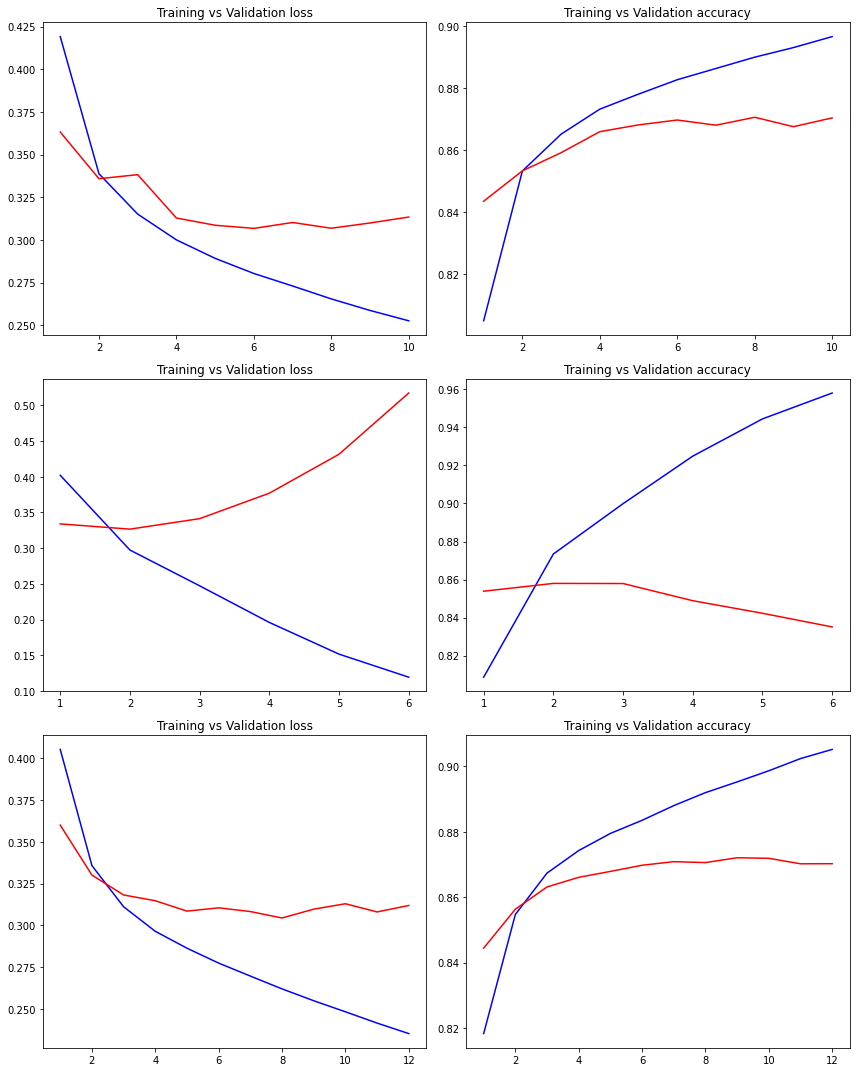

In [23]:
history_dicts = [history_dict1, history_dict2, history_dict3]



fig, axes = plt.subplots(len(history_dicts), 2,figsize=(12,5*len(history_dicts)))

for i, history_dict in enumerate(history_dicts):
    acc= history_dict['acc']
    val_acc= history_dict['val_acc']
    loss= history_dict['loss']
    val_loss= history_dict['val_loss']
    epochs = range(1, len(acc)+1)

    ax1= axes[i][0]
    ax2= axes[i][1]

    ax1.plot(epochs, loss, 'b', label='Training loss')
    ax1.plot(epochs, val_loss, 'r', label='Validation loss')
    ax1.set_title('Training vs Validation loss')

    ax2.plot(epochs, acc, 'b', label='Training accuracy')
    ax2.plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax2.set_title('Training vs Validation accuracy')
    
plt.tight_layout()
plt.show()

# 6) ÌïôÏäµÎêú Embedding Î†àÏù¥Ïñ¥ Î∂ÑÏÑù

In [28]:
embedding_layer = model3.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [39]:
# ÌïôÏäµÌïú Embedding ÌååÎùºÎØ∏ÌÑ∞Î•º ÌååÏùºÏóê Ïç®ÏÑú Ï†ÄÏû•Ìï©ÎãàÎã§. 
import os 
word_vector_dim = 16


word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/rnn_word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # Î™áÍ∞úÏùò Î≤°ÌÑ∞Î•º ÏñºÎßà ÏÇ¨Ïù¥Ï¶àÎ°ú Í∏∞Ïû¨Ìï†ÏßÄ ÌÉÄÏù¥ÌãÄÏùÑ ÏîÅÎãàÎã§.

# Îã®Ïñ¥ Í∞úÏàò(ÏóêÏÑú ÌäπÏàòÎ¨∏Ïûê 4Í∞úÎäî Ï†úÏô∏ÌïòÍ≥†)ÎßåÌÅºÏùò ÏõåÎìú Î≤°ÌÑ∞Î•º ÌååÏùºÏóê Í∏∞Î°ùÌï©ÎãàÎã§. 
vectors = model3.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [40]:
#Genism Ìå®ÌÇ§ÏßÄÎ•º ÌôúÏö©Ìï¥, ÏûÑÎ≤†Îî© ÌååÎùºÎØ∏ÌÑ∞Î•º ÏùΩÏñ¥ word vectorÎ°ú ÌôúÏö© 
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['Ïû¨ÎØ∏']
vector

array([-0.6665186 ,  0.26831368,  0.54391474, -0.37418157, -0.3075418 ,
       -0.8913851 , -1.1959023 , -1.1900973 ,  0.37767753, -0.7120493 ,
       -0.26407072, -0.69243073,  0.01793912,  0.27230784, -0.21126556,
       -0.03286643], dtype=float32)

In [41]:
word_vectors.similar_by_word("Ïû¨ÎØ∏")

[('ÏûÖÎèÑ', 0.9698927402496338),
 ('Îßò', 0.9665684700012207),
 ('Í∞úÏÑ±', 0.9664957523345947),
 ('Ï†úÏùº', 0.9660943150520325),
 ('Í∞ïÌïú', 0.9659957885742188),
 ('ÏßëÏ§ë', 0.9656028747558594),
 ('Ïä§ÌÉÄÌÅ¨ÎûòÌîÑÌä∏', 0.9637355804443359),
 ('Í≥µÍ∞ê', 0.9635799527168274),
 ('Î∂àÎ©∏', 0.9635359048843384),
 ('ÏÉÅÎãπ', 0.9622277617454529)]

# 7) ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî© ÌôúÏö©ÌïòÏó¨ ÏÑ±Îä• Í∞úÏÑ†
- ÌïúÍµ≠Ïñ¥ Word2VecÏùÄ /data Ìè¥Îçî ÏïàÏóê ÏûàÎäî word2vec_ko.modelÏùÑ ÌôúÏö©ÌïòÏÑ∏Ïöî.
- ÌïúÍµ≠Ïñ¥ Word2VecÏùÑ ÌôúÏö©Ìï† ÎïåÎäî load_word2vec_format() ÌòïÌÉúÍ∞Ä ÏïÑÎãå load() ÌòïÌÉúÎ°ú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôÄÏ£ºÏÑ∏Ïöî. ÎòêÌïú Î™®Îç∏ÏùÑ ÌôúÏö©Ìï† ÎïåÏóêÎäî ÏïÑÎûò ÏòàÏãúÏôÄ Í∞ôÏù¥ .wvÎ•º Î∂ôÏó¨ÏÑú ÌôúÏö©Ìï©ÎãàÎã§. Ï¢ÄÎçî ÏûêÏÑ∏Ìïú ÌôúÏö©Î≤ïÏóê ÎåÄÌï¥ÏÑ† Îã§Ïùå ÎßÅÌÅ¨Îì§ÏùÑ Ï∞∏Ï°∞Ìï¥Ï£ºÏÑ∏Ïöî. 


In [43]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞ÏûÖÎãàÎã§(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 300  # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# Î™®Îç∏ Íµ¨ÏÑ±
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # Ïπ¥ÌîºÌïú ÏûÑÎ≤†Îî©ÏùÑ Ïó¨Í∏∞ÏÑú ÌôúÏö©
                                 input_length=maxlen, 
                                 trainable=True))   # trainableÏùÑ TrueÎ°ú Ï£ºÎ©¥ Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 41, 300)           3000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 35, 16)            33616     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 16)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 16)             1808      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [45]:
# ÌïôÏäµÏùò ÏßÑÌñâ
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # Î™á epochÎ•º ÌõàÎ†®ÌïòÎ©¥ Ï¢ãÏùÑÏßÄ Í≤∞Í≥ºÎ•º Î≥¥Î©¥ÏÑú Î∞îÍæ∏Ïñ¥ Î¥ÖÏãúÎã§. 

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
229/229 [==============================] - 3s 11ms/step - loss: 0.6459 - accuracy: 0.5974 - val_loss: 0.4716 - val_accuracy: 0.7853
Epoch 2/20
229/229 [==============================] - 2s 8ms/step - loss: 0.4109 - accuracy: 0.8144 - val_loss: 0.3946 - val_accuracy: 0.8259
Epoch 3/20
229/229 [==============================] - 2s 8ms/step - loss: 0.3447 - accuracy: 0.8521 - val_loss: 0.3706 - val_accuracy: 0.8375
Epoch 4/20
229/229 [==============================] - 2s 8ms/step - loss: 0.3099 - accuracy: 0.8711 - val_loss: 0.3788 - val_accuracy: 0.8323
Epoch 5/20
229/229 [==============================] - 2s 8ms/step - loss: 0.2819 - accuracy: 0.8847 - val_loss: 0.3727 - val_accuracy: 0.8380
Epoch 6/20
229/229 [==============================] - 2s 8ms/step - loss: 0.2582 - accuracy: 0.8962 - val_loss: 0.4018 - val_accuracy: 0.8296
Epoch 7/20
229/229 [==============================] - 2s 8ms/step - loss: 0.2395 - accuracy: 0.9052 - val_loss: 0.3993 - val_accuracy: 0.8344
Epoch

In [46]:
# ÌÖåÏä§Ìä∏ÏÖãÏùÑ ÌÜµÌïú Î™®Îç∏ ÌèâÍ∞Ä
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 3s - loss: 0.7661 - accuracy: 0.8077
[0.7661063075065613, 0.8077180981636047]


## Word2Vec Ï†ÅÏö©

In [47]:
word2vec_file_path = os.getenv('HOME')+'/data/word2vec_ko.model'

from gensim.models.keyedvectors import Word2VecKeyedVectors
word_vectors = Word2VecKeyedVectors.load(word2vec_file_path)
vector = word_vectors.wv['ÎÅù']
vector

array([ 1.038851  , -1.1634965 ,  2.2386286 ,  0.8971453 , -2.088168  ,
       -4.1942534 , -0.02519768, -0.69813883, -0.2908033 , -1.4651134 ,
       -2.6863668 ,  0.7999443 , -0.6957915 , -0.5018775 ,  3.5025773 ,
        0.21326113, -0.6588098 , -1.1900496 ,  0.61399573,  2.1247969 ,
        0.1549463 ,  3.0840218 ,  3.1680267 , -3.9143991 ,  3.6073153 ,
        0.5315545 , -0.3511633 , -1.107248  ,  1.7767181 , -0.95981866,
        2.6072454 , -0.00697957, -3.27628   ,  1.558644  ,  0.81922376,
        1.9231955 ,  3.7026553 , -0.53824735, -0.4920138 ,  2.4657123 ,
       -2.620749  , -0.08950733,  0.61453176,  1.8866426 ,  0.257866  ,
       -2.7827141 ,  2.9129577 , -0.6313133 ,  2.0387425 , -4.222685  ,
       -2.7560544 ,  1.7903243 , -1.3080189 , -2.5531402 , -0.43849912,
       -3.1073573 , -0.29090825,  5.1817617 ,  1.9604833 , -5.1421604 ,
       -0.71431434,  4.5624633 , -0.55525815, -3.3019137 ,  1.6761336 ,
       -1.9606539 , -0.2726863 ,  0.2465995 ,  1.2685091 ,  1.60

In [48]:
vocab_size = 10000
word_vector_dim = 16
embedding_matrix = np.random.rand(vocab_size, word_vector_dim) # ÏÇ¨Ï†ÑÌïôÏäµ Î≤°ÌÑ∞Î•º Î≥µÏÇ¨Ìï† ÎçîÎØ∏Î•º ÎßåÎì≠ÎãàÎã§.

# embedding_matrixÏóê Word2Vec ÏõåÎìú Î≤°ÌÑ∞Î•º Îã®Ïñ¥ ÌïòÎÇòÏî© Ï∞®Î°ÄÎåÄÎ°ú Ïπ¥ÌîºÌï©ÎãàÎã§.
for i in range(4, vocab_size):
    if index_to_word[i] in vector:
        embedding_matrix[i] = vector[index_to_word[i]]
    
from tensorflow.keras.initializers import Constant


# Î™®Îç∏ Íµ¨ÏÑ±
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # Ïπ¥ÌîºÌïú ÏûÑÎ≤†Îî©ÏùÑ Ïó¨Í∏∞ÏÑú ÌôúÏö©
                                 input_length=maxlen, 
                                 trainable=True))   # trainableÏùÑ TrueÎ°ú Ï£ºÎ©¥ Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 41, 16)            160000    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 35, 16)            1808      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 16)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1, 16)             1808      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

/tmp/ipykernel_1988/2409365249.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if index_to_word[i] in vector:


In [49]:
# ÌïôÏäµÏùò ÏßÑÌñâ
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # Î™á epochÎ•º ÌõàÎ†®ÌïòÎ©¥ Ï¢ãÏùÑÏßÄ Í≤∞Í≥ºÎ•º Î≥¥Î©¥ÏÑú Î∞îÍæ∏Ïñ¥ Î¥ÖÏãúÎã§. 

history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
229/229 [==============================] - 2s 6ms/step - loss: 0.6618 - accuracy: 0.5943 - val_loss: 0.5980 - val_accuracy: 0.6830
Epoch 2/20
229/229 [==============================] - 1s 5ms/step - loss: 0.5217 - accuracy: 0.7420 - val_loss: 0.5084 - val_accuracy: 0.7437
Epoch 3/20
229/229 [==============================] - 1s 5ms/step - loss: 0.4401 - accuracy: 0.7943 - val_loss: 0.4249 - val_accuracy: 0.8066
Epoch 4/20
229/229 [==============================] - 1s 5ms/step - loss: 0.3974 - accuracy: 0.8200 - val_loss: 0.3944 - val_accuracy: 0.8233
Epoch 5/20
229/229 [==============================] - 1s 5ms/step - loss: 0.3721 - accuracy: 0.8343 - val_loss: 0.3815 - val_accuracy: 0.8311
Epoch 6/20
229/229 [==============================] - 1s 5ms/step - loss: 0.3544 - accuracy: 0.8447 - val_loss: 0.3846 - val_accuracy: 0.8293
Epoch 7/20
229/229 [==============================] - 1s 5ms/step - loss: 0.3407 - accuracy: 0.8519 - val_loss: 0.3829 - val_accuracy: 0.8308
Epoch 

In [50]:
# ÌÖåÏä§Ìä∏ÏÖãÏùÑ ÌÜµÌïú Î™®Îç∏ ÌèâÍ∞Ä
results = model.evaluate(X_test,  y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 0.3864 - accuracy: 0.8373
[0.3864210247993469, 0.8373374938964844]


## üí° ÌöåÍ≥†
- NLPÎäî Ìù•ÎØ∏Î°úÏö¥Îç∞, Ïó≠Ïãú ÌïúÍµ≠Ïñ¥Î•º Î∂ÑÏÑùÌïòÎäî Í±¥ ÏâΩÏßÄÎäî ÏïäÎäî Í±∞ Í∞ôÎã§
- Îã§ÏñëÌïú ÏûÑÎ≤†Îî© Í∏∞Î≤ïÍ≥º Word2VecÏóê ÎåÄÌïú Í≥µÎ∂ÄÍ∞Ä Îçî ÌïÑÏöîÌï† Í≤É Í∞ôÎã§